In [1]:
import numpy as np
import pandas as pd

In this activity we will apply PCA to a dataset of health data. However, first we will try and implement PCA from scratch!

In [2]:
np.random.seed(234) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [3]:
class1_sample

array([[ 0.81879162,  0.92157829, -0.96973267,  1.4252155 , -1.28355374,
         0.4789592 , -0.08270438,  0.90837517,  1.67798561,  1.04408091,
         0.84703683,  0.14184493, -0.59136144,  1.31076281,  0.71895176,
         0.77428894, -0.47096903, -1.16190998,  0.23716386,  0.71999964],
       [-1.04355064, -0.08738186,  0.93466579, -0.55706272,  1.09625686,
         1.34458964, -0.88845473, -0.64559131,  0.29918144,  0.1496757 ,
         0.50577368, -1.14321737, -0.46415036,  1.17479389, -0.59636537,
        -0.65856962,  2.1580121 ,  1.22075543,  0.37009495, -0.86680023],
       [ 0.3509007 , -3.12888464,  0.04386634,  0.92682445, -1.93247255,
        -0.17542066, -0.30076649, -1.32361363,  0.1094715 , -0.25247508,
         0.39264502,  0.63979663, -0.79785911, -0.05046953,  0.25624696,
         0.42183733, -0.01163673,  0.14278476,  2.05919819, -0.34668516]])

In [6]:
# visualize class 1 and class 2 onto 3D plot
import plotly.graph_objects as go
trace1 = go.Scatter3d(x=class1_sample[0,:],y=class1_sample[1,:],z=class1_sample[2,:],mode='markers',marker=dict(size=3,symbol="circle",color='red'),name="Class 1" )
trace2 = go.Scatter3d(x=class2_sample[0,:],y=class2_sample[1,:],z=class2_sample[2,:],mode='markers',marker=dict(color='green', size=3,symbol="circle"),name="Class 2" )
data = [trace1, trace2]
fig = go.Figure(data=data)
fig.show()

In [7]:
# merge the dataset and ignore the class labels
Merged = np.concatenate((class1_sample,class2_sample),axis = 1)
Merged.shape

(3, 40)

In [8]:
# compute mean of x,y,z dimenstion and create a vector
X = Merged.mean(1)
vect_mean = X.reshape(3,1)

In [9]:
mean_x = np.mean(Merged[0,:])
mean_y = np.mean(Merged[1,:])
mean_z = np.mean(Merged[2,:])

print(mean_x,mean_y,mean_z)

0.7725718581395066 0.6832479735227357 0.43460517732932963


In [10]:
scatter = np.zeros((3,3))

In [11]:
Merged[:,0].shape

(3,)

In [12]:
for i in range(Merged.shape[1]):
    scatter += (Merged[:,i].reshape(3,1) - vect_mean).dot((Merged[:,i].reshape(3,1) - vect_mean).T)

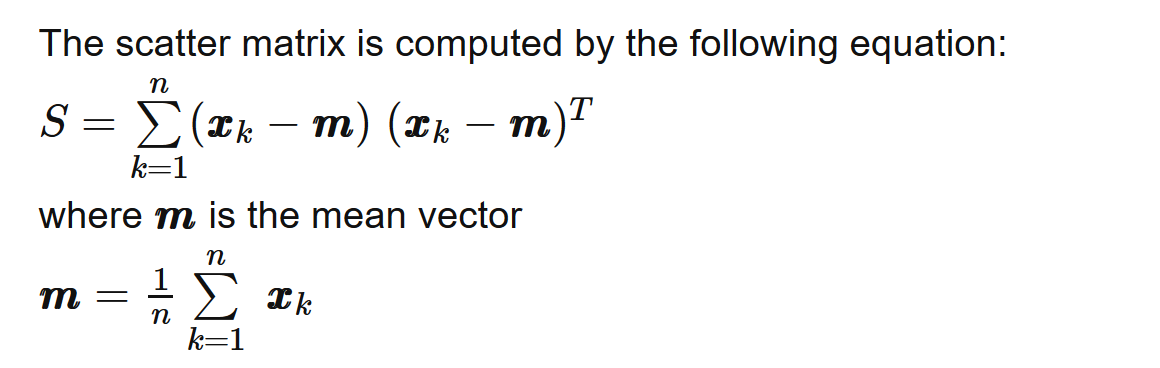

In [13]:
# Next, let's compute the scatter matrix of our data (see image above)

# Print the scatter matrix
print('Scatter Matrix:\n', scatter)

# We can also compute PCA with the covariance matrix (np.cov)
cov_mat = np.cov(Merged)
print('Covariance Matrix:\n', cov_mat)

Scatter Matrix:
 [[39.35126181  4.22467775 12.74899364]
 [ 4.22467775 50.9168567  10.18400644]
 [12.74899364 10.18400644 66.86899978]]
Covariance Matrix:
 [[1.00900671 0.10832507 0.32689727]
 [0.10832507 1.30556043 0.26112837]
 [0.32689727 0.26112837 1.71458974]]


How do the covariance matrix and scatter matrix differ? You can wait until the end to answer this.


In [14]:
# Let's compute the eigenvectors and eigen values
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Similarly, apply the same function to the covariance matrix
print('Eigen values of Covariance matrix',eig_vals)
print('Eigen vectors of Covariance matrix',eig_vecs)

Eigen values of Covariance matrix [1.9640841  0.88074748 1.1843253 ]
Eigen vectors of Covariance matrix [[ 0.33730459  0.93260098  0.12837844]
 [ 0.39443594 -0.01618419 -0.91878091]
 [ 0.85477828 -0.36054609  0.37331034]]


In [15]:
# Take the scatter matrix and compute the eigenvectors and eigenvalues (np.linalg.eig)
# Print out all of the eigenvectors and eigenvalues (for both scatter matrix & covariance matrix)
scat_eig_vals, scat_eig_vecs = np.linalg.eig(scatter)
print('Eigen values of scatter matrix',scat_eig_vals)
print('Eigen vectors of scatter matrix',scat_eig_vecs)

Eigen values of scatter matrix [76.59928003 34.34915169 46.18868656]
Eigen vectors of scatter matrix [[ 0.33730459  0.93260098  0.12837844]
 [ 0.39443594 -0.01618419 -0.91878091]
 [ 0.85477828 -0.36054609  0.37331034]]


In [16]:
print('Scaling factor: ', scat_eig_vals/eig_vals)

Scaling factor:  [39. 39. 39.]


**Answer:**
Covariance matrix is scaled version of scatter matrix. it is scaled by N-1 which is (40-1) = 39. Eigen vectors are same only eigen values are different for scatter and covariance matrix

In [17]:
# Let's visualize the data now
# Visualize all of the original points together with the eigenvectors
Mer_fig = go.Scatter3d(x=Merged[0,:],y=Merged[1,:],z=Merged[2,:],mode='markers',marker=dict(size=3,symbol="circle",color='darkcyan'),name="Class samples")
Eig_fig1 =  go.Scatter3d(x = [mean_x, 1.9640841*scat_eig_vecs.T[0][0]],y= [mean_y, 1.9640841*scat_eig_vecs.T[0][1]],z= [mean_z, 1.9640841*scat_eig_vecs.T[0][2]], mode='lines+markers',marker=dict(size=3,symbol='diamond',color='yellow'),name="Eig1")
Eig_fig2 =  go.Scatter3d(x = [mean_x, 0.88074748*scat_eig_vecs.T[1][0]],y= [mean_y, 0.88074748*scat_eig_vecs.T[1][1]],z= [mean_z, 0.88074748*scat_eig_vecs.T[1][2]], mode='lines+markers',marker=dict(size=3,symbol='diamond',color='red'),name="Eig2")
Eig_fig3 =  go.Scatter3d(x = [mean_x, 1.1843253*scat_eig_vecs.T[2][0]],y= [mean_y, 1.1843253*scat_eig_vecs.T[2][1]],z= [mean_z, 1.1843253*scat_eig_vecs.T[2][2]], mode='lines+markers',marker=dict(size=3,symbol='diamond',color='blue'),name="Eig3")
data = [Mer_fig,Eig_fig1,Eig_fig2,Eig_fig3]
fig = go.Figure(data=data)
fig.update_layout(title="Eigen vectors")
fig.show()

# Visualize the eigenvectors
# You can either use altair or matplotlib (code below)
# a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")

In [18]:
# Projecting data

# Sort the eigenvectors by descreasing eigenvalues
# You can start with the code below
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(scat_eig_vals[i]), scat_eig_vecs[:,i]) for i in range(len(scat_eig_vals))]
eig_pairs

[(76.59928002932905, array([0.33730459, 0.39443594, 0.85477828])),
 (34.34915169429428, array([ 0.93260098, -0.01618419, -0.36054609])),
 (46.18868656007505, array([ 0.12837844, -0.91878091,  0.37331034]))]

In [19]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [20]:
eig_pairs

[(76.59928002932905, array([0.33730459, 0.39443594, 0.85477828])),
 (46.18868656007505, array([ 0.12837844, -0.91878091,  0.37331034])),
 (34.34915169429428, array([ 0.93260098, -0.01618419, -0.36054609]))]

In [21]:
#Now let's choose the k eigenvectors with the largest eigenvalues
# In our case make k = 2
# We call this our W matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.33730459  0.12837844]
 [ 0.39443594 -0.91878091]
 [ 0.85477828  0.37331034]]


In [22]:

# Finally, we will project our data onto 2D plane
transformed = matrix_w.T.dot(Merged)
s1 = go.Scatter(x=transformed[0,0:20],y=transformed[1,0:20],mode='markers',marker=dict(size=6,symbol="circle",color='limegreen'),name = 'Class 1')
s2 = go.Scatter(x=transformed[0,20:40],y=transformed[1,20:40],mode='markers',marker=dict(size=6,symbol="circle",color='tomato'),name = 'Class 2')
data = [s1,s2]
fig = go.Figure(data=data)
fig.update_layout(title="Transformed data", xaxis_title="X",yaxis_title="Y",)
fig.show()

# Visualize the transformed data and add the labels (class_1 and class_2)

In [23]:
#Let's compare our result with that of sklearn library
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(Merged.T)
print('PCA components - i.e(Eigen Vectors)  :\n',sklearn_pca.components_)
print('Explained Variance i.e(Eigen values) :\n ',sklearn_pca.explained_variance_)
print('Mean :\n',sklearn_pca.mean_)
#Eigen vectors can be positive / negative
sklearn_transf = sklearn_transf * (-1)
s3 = go.Scatter(x=sklearn_transf[0:20,0],y=sklearn_transf[0:20,1],mode='markers',marker=dict(size=6,symbol="circle",color='limegreen'),name = 'Class 1')
s4 = go.Scatter(x=sklearn_transf[20:40,0],y=sklearn_transf[20:40,1],mode='markers',marker=dict(size=6,symbol="circle",color='tomato'),name='class 2')
data_pca = [s3,s4]
fig = go.Figure(data=data_pca)
fig.update_layout(title="Using Scikit Learn", xaxis_title="PC1",yaxis_title="PC 2",)
fig.show()
# visualize the results

PCA components - i.e(Eigen Vectors)  :
 [[-0.33730459 -0.39443594 -0.85477828]
 [-0.12837844  0.91878091 -0.37331034]]
Explained Variance i.e(Eigen values) :
  [1.9640841 1.1843253]
Mean :
 [0.77257186 0.68324797 0.43460518]


In [24]:
# Finally, I added some data in the activity. Read it and try projecting the data and

In [28]:
#Load demographic.csv
#Problem : find which category the family income belongs to based on 5 Variables(Gender, Ethnicity,Citizionship,family size, education level)


In [29]:
df = pd.read_csv('demographic.csv',encoding='latin1')
df

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727,8,2,1,26,NaN,2,2,2.0,NaN,...,3.0,NaN,NaN,27141.631824,28115.568221,1,104,77.0,77.0,NaN
10171,83728,8,2,2,2,24.0,1,1,2.0,24.0,...,3.0,1.0,3.0,15274.475360,16512.138781,1,107,8.0,8.0,1.95
10172,83729,8,2,2,42,NaN,4,4,2.0,NaN,...,5.0,3.0,NaN,24122.248900,26902.344381,1,104,7.0,7.0,3.66
10173,83730,8,2,1,7,NaN,2,2,1.0,84.0,...,4.0,1.0,3.0,25521.878546,26686.025573,2,109,6.0,6.0,1.05


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   SDDSRVYR  10175 non-null  int64  
 2   RIDSTATR  10175 non-null  int64  
 3   RIAGENDR  10175 non-null  int64  
 4   RIDAGEYR  10175 non-null  int64  
 5   RIDAGEMN  673 non-null    float64
 6   RIDRETH1  10175 non-null  int64  
 7   RIDRETH3  10175 non-null  int64  
 8   RIDEXMON  9813 non-null   float64
 9   RIDEXAGM  4213 non-null   float64
 10  DMQMILIZ  6261 non-null   float64
 11  DMQADFC   543 non-null    float64
 12  DMDBORN4  10175 non-null  int64  
 13  DMDCITZN  10171 non-null  float64
 14  DMDYRSUS  1908 non-null   float64
 15  DMDEDUC3  2803 non-null   float64
 16  DMDEDUC2  5769 non-null   float64
 17  DMDMARTL  5769 non-null   float64
 18  RIDEXPRG  1309 non-null   float64
 19  SIALANG   10175 non-null  int64  
 20  SIAPROXY  10174 non-null  fl

In [31]:
#Select Gender,Ethnicity,citizionship,Family size,family incom,Education level
upd_df = df[['RIAGENDR','RIDRETH1','DMDCITZN','DMDFMSIZ','INDFMIN2','DMDEDUC2']]

In [32]:
upd_df

,RIAGENDR,RIDRETH1,DMDCITZN,DMDFMSIZ,INDFMIN2,DMDEDUC2
0,1,4,1.0,3,4.0,3.0
1,1,3,1.0,4,7.0,3.0
2,1,3,1.0,2,10.0,4.0
3,1,3,1.0,4,9.0,NaN
4,2,3,1.0,2,15.0,5.0
...,...,...,...,...,...,...
10170,1,2,1.0,5,77.0,5.0
10171,2,1,1.0,4,8.0,NaN
10172,2,4,1.0,1,7.0,5.0
10173,1,2,1.0,4,6.0,NaN


In [33]:
upd_df.isnull().sum().sum()

4533

In [34]:
#fill nan values
upd_df.fillna(method='ffill', inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
upd_df

,RIAGENDR,RIDRETH1,DMDCITZN,DMDFMSIZ,INDFMIN2,DMDEDUC2
0,1,4,1.0,3,4.0,3.0
1,1,3,1.0,4,7.0,3.0
2,1,3,1.0,2,10.0,4.0
3,1,3,1.0,4,9.0,4.0
4,2,3,1.0,2,15.0,5.0
...,...,...,...,...,...,...
10170,1,2,1.0,5,77.0,5.0
10171,2,1,1.0,4,8.0,5.0
10172,2,4,1.0,1,7.0,5.0
10173,1,2,1.0,4,6.0,5.0


In [36]:
#create a comprehensive list of unwanted values
#INDFMIN2 represents family income
#INDFMIN2 = 77(Refused)
#INDFMIN2 = 99(Don't Know)
#DMDEDUC2 represents Education Level 
#DMDEDUC2 = 7(Refused)
#DMDEDUC2 = 9(Don't KNow)
#DMDCITZN represents citizionship status
#DMDCITZN = 7 (Refused)
#DMDCITZN = 9 (Dont know)

unwant = upd_df.index[upd_df['INDFMIN2'] == 77] | upd_df.index[upd_df['INDFMIN2'] == 99] |upd_df.index[upd_df['DMDEDUC2'] == 9]|upd_df.index[upd_df['DMDEDUC2'] == 7]|upd_df.index[upd_df['DMDCITZN'] == 9]|upd_df.index[upd_df['DMDCITZN'] == 7]

<ipython-input-36-84d7cfdba56e>:12: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead



In [37]:
#drop unwanted rows
upd_df.drop(unwant, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
#
upd_df['INDFMIN2'].loc[(upd_df['INDFMIN2'] < 5.0)|(upd_df['INDFMIN2'] == 13.0)] = 1.0
upd_df['INDFMIN2'].loc[(upd_df['INDFMIN2'] >= 5.0 )&(upd_df['INDFMIN2'] < 10.0)|(upd_df['INDFMIN2'] == 12.0)] = 2.0
#upd_df['INDFMIN2'].loc[(upd_df['INDFMIN2'] >= 8.0 )&(upd_df['INDFMIN2'] < 10.0)] = 3.0
upd_df['INDFMIN2'].loc[(upd_df['INDFMIN2'] >=13.0 )|(upd_df['INDFMIN2'] == 10.0 )] = 3.0


#upd_df.INDFMIN2.replace([3.0, 4.0,5.0], [2.0,3.0,3.0], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
#Reset index after all the cleanup
rst_index = upd_df.reset_index(drop=True)

In [40]:
rst_index.DMDEDUC2.unique()

array([3., 4., 5., 2., 1.])

In [41]:
features = ['RIAGENDR', 'RIDRETH1', 'DMDCITZN', 'DMDFMSIZ','DMDEDUC2']

In [42]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = rst_index.loc[:, features].values
# Standardizing the features
#x = StandardScaler().fit_transform(x)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [44]:
df_final = pd.concat([principalDf, rst_index[['INDFMIN2']]], axis = 1)

In [45]:
df_final

,principal component 1,principal component 2,INDFMIN2
0,-0.797149,-0.221838,1.0
1,0.342330,0.351955,2.0
2,-1.727193,0.114644,3.0
3,0.236165,-0.264796,2.0
4,-1.834425,-0.496112,3.0
...,...,...,...
9842,-1.081571,3.517149,2.0
9843,0.444534,0.651475,2.0
9844,-2.973904,-1.069905,2.0
9845,0.287801,-0.118033,2.0


In [46]:
df_final.INDFMIN2.unique()
#INDFMIN2 = 1 is income<$20,000
#INDFMIN2 = 2 is $20,000 < income > $65,000
#INDFMIN2 = 3 is income > $65,000

array([1., 2., 3.])

In [47]:
import plotly.express as px
fig = px.scatter(principalDf,x="principal component 1", y = "principal component 2",color=rst_index['INDFMIN2'])
fig.show()

In [48]:
pca.explained_variance_ratio_

array([0.49190758, 0.25849701])

In [49]:
pca.components_

array([[-0.00106696, -0.15780001,  0.01152754,  0.98167925, -0.1061649 ],
       [ 0.00599475, -0.76351327,  0.02522646, -0.1897199 , -0.61675079]])